In [1]:
import numpy
import random
from matplotlib import pyplot
from matplotlib import colors
from matplotlib import font_manager
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
from PIL import Image
import pandas
from sklearn.linear_model import LinearRegression, LogisticRegression
from mpl_toolkits.mplot3d import Axes3D
import seaborn
import scipy
from scipy import stats
from scipy.stats import poisson, ttest_ind
from scipy import linalg
import xarray as xr
import netCDF4
import cftime
import os
import warnings

ERROR 1: PROJ: proj_create_from_database: Open of /glade/u/apps/opt/conda/envs/npl-2022b/share/proj failed


In [2]:
# Find Directory and Folders
Diri = "/glade/scratch/whimkao/MPAS/Forecast_Q1/"
#
# List Files
Files = os.listdir(Diri)
Files

['FILE:2021-08-28_00',
 'FILE:2021-08-26_00',
 'FILE:2021-08-28_12',
 'log.atmosphere.0028.err',
 'history.2021-08-29_00.00.00.nc',
 'log.atmosphere.0075.err',
 'diag.2021-08-29_15.00.00.nc',
 'init_atmosphere_model',
 'log.atmosphere.0047.err',
 'diag.2021-08-27_00.00.00.nc',
 'log.atmosphere.0076.err',
 'diag.2021-08-28_21.00.00.nc',
 'VERSION',
 'log.atmosphere.0031.err',
 'history.2021-08-28_03.00.00.nc',
 'diag.2021-08-27_12.00.00.nc',
 'history.2021-08-30_09.00.00.nc',
 'target_domain',
 'log.atmosphere.0072.err',
 'log.atmosphere.0067.err',
 'history.2021-08-28_18.00.00.nc',
 'log.atmosphere.0083.err',
 'log.atmosphere.0056.err',
 'history.2021-08-29_03.00.00.nc',
 'diag.2021-08-29_21.00.00.nc',
 'log.atmosphere.0027.err',
 'log.atmosphere.0013.err',
 'log.atmosphere.0064.err',
 'plot_terrain.ncl',
 'log.init_atmosphere.0000.out',
 'diag.2021-08-31_12.00.00.nc',
 'log.atmosphere.0009.err',
 'log.atmosphere.0086.err',
 'log.atmosphere.0040.err',
 'restart_timestamp',
 'diag.2021-

In [3]:
xr.open_dataset(Diri + 'history.2021-08-27_00.00.00.nc')

<xarray.Dataset>
Dimensions:                 (Time: 1, nCells: 40962, nVertLevels: 41,
                             nEdges: 122880, nVertices: 81920, TWO: 2,
                             maxEdges: 10, maxEdges2: 20, vertexDegree: 3,
                             nVertLevelsP1: 42, nOznLevels: 59, nMonths: 12,
                             nSoilLevels: 4)
Dimensions without coordinates: Time, nCells, nVertLevels, nEdges, nVertices,
                                TWO, maxEdges, maxEdges2, vertexDegree,
                                nVertLevelsP1, nOznLevels, nMonths, nSoilLevels
Data variables: (12/115)
    qv                      (Time, nCells, nVertLevels) float32 ...
    qc                      (Time, nCells, nVertLevels) float32 ...
    qr                      (Time, nCells, nVertLevels) float32 ...
    qi                      (Time, nCells, nVertLevels) float32 ...
    qs                      (Time, nCells, nVertLevels) float32 ...
    qg                      (Time, nCells, nVertLevels) float32 ...
    ...                      ...
    sst                     (Time, nCells) float32 ...
    vegfra                  (Time, nCells) float32 ...
    xice                    (Time, nCells) float32 ...
    sh2o                    (Time, nCells, nSoilLevels) float32 ...
    smois                   (Time, nCells, nSoilLevels) float32 ...
    tslb                    (Time, nCells, nSoilLevels) float32 ...
Attributes: (12/118)
    model_name:                             mpas
    core_name:                              atmosphere
    source:                                 MPAS
    Conventions:                            MPAS
    git_version:                            v7.3
    on_a_sphere:                            YES
    ...                                     ...
    config_oml1d:                           NO
    config_oml_hml0:                        30.0
    config_oml_gamma:                       0.14
    config_oml_relaxation_time:             864000.0
    config_sounding_interval:               none
    file_id:                                ugni7gjesp

In [4]:
# Open Longitude, Latitude, Surface Pressure and Altitude Files
Longitude_File = numpy.array((xr.open_dataset(Diri + 'history.2021-08-27_00.00.00.nc').lonCell) * 360 / (2*numpy.pi))
Latitude_File = numpy.array((xr.open_dataset(Diri + 'history.2021-08-27_00.00.00.nc').latCell) * 360 / (2*numpy.pi))
Sfc_Pressure_File = numpy.array(xr.open_dataset(Diri + 'history.2021-08-27_00.00.00.nc').surface_pressure[0,:])
Altitude_File = numpy.array(xr.open_dataset(Diri + 'history.2021-08-27_00.00.00.nc').zgrid[:,0])

In [5]:
Latitude_File

array([ 26.56505 ,  26.56505 ,  90.      , ..., -52.303326, -52.303326,
       -53.25446 ], dtype=float32)

In [6]:
# Keep Data Within Target Area
Longitude_List = []
Latitude_List = []
Sfc_Pressure_List = []
Altitude_List = []
for i in range(len(Latitude_File)):
    if Latitude_File[i] >= 15 and Latitude_File[i] <= 35 and Longitude_File[i] >=360-98 and Longitude_File[i] < 360-75:
        Longitude_List.append(Longitude_File[i])
        Latitude_List.append(Latitude_File[i])
        Sfc_Pressure_List.append(Sfc_Pressure_File[i])
        Altitude_List.append(Altitude_File[i])
Longitude_NATL = numpy.array(Longitude_List)
Latitude_NATL = numpy.array(Latitude_List)
Sfc_Pressure_NATL = numpy.array(Sfc_Pressure_List)
Altitude_NATL = numpy.array(Altitude_List)

In [7]:
# Estimate Sea Level Pressure Using Barometric Equation
Scale_Height = 8500
SLP_NATL = Sfc_Pressure_NATL / numpy.exp(-Altitude_NATL / Scale_Height)
print (SLP_NATL)

[101598.37  101062.46  101191.16  101886.49  101096.086 101206.336
 101041.09  101524.76  101236.55  101352.69  101704.3   101916.47
 101651.41  101500.27  100969.5   100862.91  101184.72  101177.4
 101251.99  101355.66  101402.61  101536.26  100864.92  100934.03
 101011.79  101314.89  101007.83  101515.336 101404.46  101473.82
 101620.67  101749.3   101609.914 101083.14  100933.31  101674.734
 101181.875 101174.72  101195.22  101234.695 101313.03  101290.64
 101234.19  101175.23  101962.664 101787.6   101707.33  101831.73
 102004.73  101536.82  100875.61  100885.86  100983.1   101002.
 101123.875 101196.92  101168.85  101036.92  100936.25  101012.11
 101118.52  101265.984 101392.44  101303.44  101081.87  101146.664
 101258.81  100990.8   101097.96  101161.94  100959.67  101128.945
 101050.86  101383.3   101260.89  101083.92  101276.555 101169.21
 101454.41  101503.664 101588.65  101878.914 101786.43  101761.7
 101943.62  101491.89  101572.22  101327.164 101473.48  101214.766
 101242.1

In [8]:
# Find Pressure and Lat Lon of Mininum SLP Location
Min_SLP_Index = numpy.argmin(SLP_NATL)
print (SLP_NATL[Min_SLP_Index])
print (Longitude_NATL[Min_SLP_Index] - 360)
print (Latitude_NATL[Min_SLP_Index])

100572.36
-79.807373046875
18.22491


In [9]:
# Create Colour List For Labelling Sea Level Pressure
Colour_List = []
for i in range(len(SLP_NATL)):
    if SLP_NATL[i] >= 101200:
        Colour_List.append('black')
    elif SLP_NATL[i] >= 101000:
        Colour_List.append('navy')
    elif SLP_NATL[i] >= 100800:
        Colour_List.append('deepskyblue')
    elif SLP_NATL[i] >= 100600:
        Colour_List.append('cyan')
    else:
        Colour_List.append('limegreen')

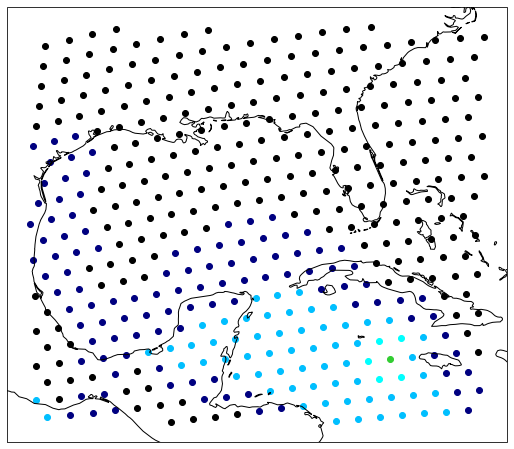

In [10]:
# Plot Sea Level Pressure Map
Fig = pyplot.figure(figsize=(15,8))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
for i in range(len(SLP_NATL)):
    pyplot.scatter(Longitude_NATL[i], Latitude_NATL[i], c=Colour_List[i])
#pyplot.xlim(360-95,360-80)
#pyplot.ylim(20,35)

In [11]:
# Create Time Step List
Time_Step_List = []
for i in range(5):
    for j in range(8):
        if j <= 3:
            Time_Step = "2021-08-"+str(i+27)+"_0"+str(j*3)+".00.00"
        else:
            Time_Step = "2021-08-"+str(i+27)+"_"+str(j*3)+".00.00"
        Time_Step_List.append(Time_Step)
Time_Step = "2021-09-01_00.00.00"
Time_Step_List.append(Time_Step)
print (Time_Step_List)

['2021-08-27_00.00.00', '2021-08-27_03.00.00', '2021-08-27_06.00.00', '2021-08-27_09.00.00', '2021-08-27_12.00.00', '2021-08-27_15.00.00', '2021-08-27_18.00.00', '2021-08-27_21.00.00', '2021-08-28_00.00.00', '2021-08-28_03.00.00', '2021-08-28_06.00.00', '2021-08-28_09.00.00', '2021-08-28_12.00.00', '2021-08-28_15.00.00', '2021-08-28_18.00.00', '2021-08-28_21.00.00', '2021-08-29_00.00.00', '2021-08-29_03.00.00', '2021-08-29_06.00.00', '2021-08-29_09.00.00', '2021-08-29_12.00.00', '2021-08-29_15.00.00', '2021-08-29_18.00.00', '2021-08-29_21.00.00', '2021-08-30_00.00.00', '2021-08-30_03.00.00', '2021-08-30_06.00.00', '2021-08-30_09.00.00', '2021-08-30_12.00.00', '2021-08-30_15.00.00', '2021-08-30_18.00.00', '2021-08-30_21.00.00', '2021-08-31_00.00.00', '2021-08-31_03.00.00', '2021-08-31_06.00.00', '2021-08-31_09.00.00', '2021-08-31_12.00.00', '2021-08-31_15.00.00', '2021-08-31_18.00.00', '2021-08-31_21.00.00', '2021-09-01_00.00.00']


In [12]:
# Create Empty Arrays to Store Info
Min_SLP = numpy.zeros(len(Time_Step_List))
Min_SLP_Lon_Lat = numpy.zeros((2, len(Time_Step_List)))

In [13]:
# Open Longitude, Latitude, Surface Pressure and Altitude Files For Each Time Step
for i in range(len(Time_Step_List)):
    File = xr.open_dataset(Diri + 'history.'+Time_Step_List[i] + '.nc')
    Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
    Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
    Sfc_Pressure_File = numpy.array(File.surface_pressure[0,:])
    Altitude_File = numpy.array(File.zgrid[:,0])
#
# Keep Data Within Target Area
    Longitude_List = []
    Latitude_List = []
    Sfc_Pressure_List = []
    Altitude_List = []
    for k in range(len(Latitude_File)):
        if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
            Longitude_List.append(Longitude_File[k])
            Latitude_List.append(Latitude_File[k])
            Sfc_Pressure_List.append(Sfc_Pressure_File[k])
            Altitude_List.append(Altitude_File[k])
    Longitude_NATL = numpy.array(Longitude_List)
    Latitude_NATL = numpy.array(Latitude_List)
    Sfc_Pressure_NATL = numpy.array(Sfc_Pressure_List)
    Altitude_NATL = numpy.array(Altitude_List)
#
# Estimate Sea Level Pressure Using Barometric Equation
    Scale_Height = 8500
    SLP_NATL = Sfc_Pressure_NATL / numpy.exp(-Altitude_NATL / Scale_Height)
#
# Find Pressure and Lat Lon of Mininum SLP Location
    Min_SLP_Index = numpy.argmin(SLP_NATL)
    Min_SLP[i] = SLP_NATL[Min_SLP_Index] / 100.
    Min_SLP_Lon_Lat[0][i] = Longitude_NATL[Min_SLP_Index] - 360
    Min_SLP_Lon_Lat[1][i] = Latitude_NATL[Min_SLP_Index]
print (Min_SLP)
print (Min_SLP_Lon_Lat)

[1005.72359375 1007.53882813 1006.8778125  1005.55195312 1006.40523437
 1007.56132813 1007.49984375 1006.72328125 1007.670625   1009.13054688
 1008.61039063 1007.93960938 1008.78742187 1009.80210937 1009.81921875
 1009.06015625 1009.2046875  1009.81929687 1010.31054688 1009.37546875
 1009.20945312 1009.81257812 1008.73117187 1007.93898438 1007.34046875
 1007.61398437 1007.10023438 1005.58851563 1004.69476562 1004.40492188
 1003.271875   1002.55585937 1001.95609375 1003.09601562 1003.7034375
 1002.14726563 1002.01109375 1002.71679688 1002.93171875 1002.64953125
 1002.84976563]
[[-79.80737305 -80.38494873 -81.49627686 -82.0798645  -82.0798645
  -82.6701355  -82.6701355  -83.78015137 -84.37835693 -84.37835693
  -84.9855957  -86.09329224 -86.71087646 -87.34082031 -87.34082031
  -89.08786011 -89.08786011 -90.18591309 -89.74899292 -90.84506226
  -91.5255127  -91.14022827 -92.23251343 -92.23251343 -92.97290039
  -92.97290039 -92.97290039 -93.75491333 -93.75491333 -93.75491333
  -93.75491333 -

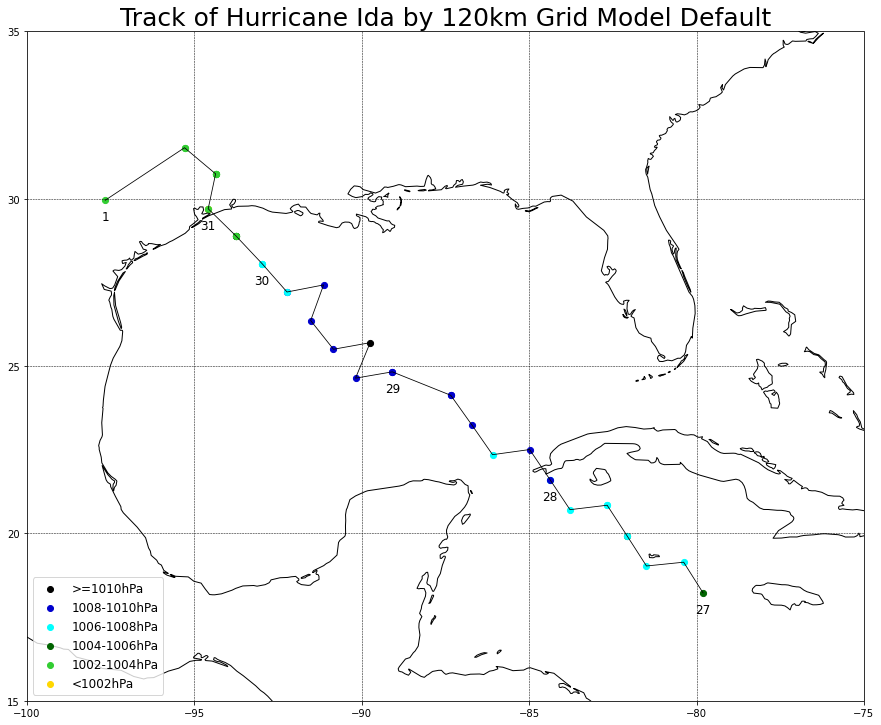

In [14]:
# Create Colour List For Labelling Sea Level Pressure
Colour_List = []
Colours = ['black', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold']
Colour_Labels = ['>=1010hPa', '1008-1010hPa', '1006-1008hPa', '1004-1006hPa', '1002-1004hPa', '<1002hPa']
for i in range(len(Min_SLP)):
    if Min_SLP[i] >= 1010:
        Colour_List.append(Colours[0])
    elif Min_SLP[i] >= 1008:
        Colour_List.append(Colours[1])
    elif Min_SLP[i] >= 1006:
        Colour_List.append(Colours[2])
    elif Min_SLP[i] >= 1004:
        Colour_List.append(Colours[3])
    elif Min_SLP[i] >= 1002:
        Colour_List.append(Colours[4])
    else:
        Colour_List.append(Colours[5])
#
# Plot Sea Level Pressure Map
Fig = pyplot.figure(figsize=(15,15))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
pyplot.plot(Min_SLP_Lon_Lat[0], Min_SLP_Lon_Lat[1], c='black', linewidth=0.8)
for i in range(len(Min_SLP)):
    pyplot.scatter(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i], c=Colour_List[i], s=38)
# Label Points
    if i % 8 == 0 and i != 40:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]-0.5, str(int(i/8+27)), ha='center', va='center', \
        fontdict={'size':12}, color='black')
    if i == 40:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]-0.5, str(1), ha='center', va='center', \
        fontdict={'size':12}, color='black')
#
# Add Gridlines
pyplot.xlim(-98,-75)
pyplot.ylim(15,35)
x_Axis = numpy.arange(-100,-70,5)
y_Axis = numpy.arange(15,40,5)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
Gridline.xlocator = mticker.FixedLocator(x_Axis)
Gridline.ylocator = mticker.FixedLocator(y_Axis)
pyplot.title('Track of Hurricane Ida by 120km Grid Model Default', fontsize=25)
#
# Create Legend
for k in range(len(Colours)):
    pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
pyplot.legend(loc=3, fontsize=12)
Fig.savefig('Q1_Model.png', bbox_inches='tight')

In [15]:
# Create Colour List For Labelling Sea Level Pressure
Model_Colour_List = []
Colours = ['black', 'navy', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', \
'red', 'darkviolet']
Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', '965-980hPa', '950-965hPa', \
'930-950hPa', '<930hPa']
for i in range(len(Min_SLP)):
    if Min_SLP[i] >= 1010:
        Model_Colour_List.append(Colours[0])
    elif Min_SLP[i] >= 1005:
        Model_Colour_List.append(Colours[1])
    elif Min_SLP[i] >= 1000:
        Model_Colour_List.append(Colours[2])
    elif Min_SLP[i] >= 990:
        Model_Colour_List.append(Colours[3])
    elif Min_SLP[i] >= 980:
        Model_Colour_List.append(Colours[4])
    elif Min_SLP[i] >= 965:
        Model_Colour_List.append(Colours[5])
    elif Min_SLP[i] >= 950:
        Model_Colour_List.append(Colours[6])
    elif Min_SLP[i] >= 930:
        Model_Colour_List.append(Colours[7])
    else:
        Model_Colour_List.append(Colours[6])

In [16]:
Ida_Best_Track = pandas.read_csv("Hurricane_Ida_BST.csv")
BST_SLP = numpy.array(Ida_Best_Track["Pressure"])
BST_Lat = numpy.array(Ida_Best_Track["Lat"])
BST_Lon = numpy.array(Ida_Best_Track["Lon"])
BST_SLP

array([1004, 1002,  996,  987,  989,  987,  986,  976,  967,  950,  929,
        932,  944,  978,  992,  996,  996,  996,  996,  999, 1000])

In [17]:
# Create Colour List For Labelling Sea Level Pressure
BST_Colour_List = []
Colours = ['black', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', \
'red', 'darkviolet']
Colour_Labels = ['>=1010hPa', '1005-1010hPa', '1000-1005hPa', '990-1000hPa', '980-990hPa', '965-980hPa', '950-965hPa', \
'930-950hPa', '<930hPa']
for i in range(len(BST_SLP)):
    if BST_SLP[i] >= 1010:
        BST_Colour_List.append(Colours[0])
    elif BST_SLP[i] >= 1005:
        BST_Colour_List.append(Colours[1])
    elif BST_SLP[i] >= 1000:
        BST_Colour_List.append(Colours[2])
    elif BST_SLP[i] >= 990:
        BST_Colour_List.append(Colours[3])
    elif BST_SLP[i] >= 980:
        BST_Colour_List.append(Colours[4])
    elif BST_SLP[i] >= 965:
        BST_Colour_List.append(Colours[5])
    elif BST_SLP[i] >= 950:
        BST_Colour_List.append(Colours[6])
    elif BST_SLP[i] >= 930:
        BST_Colour_List.append(Colours[7])
    else:
        BST_Colour_List.append(Colours[8])

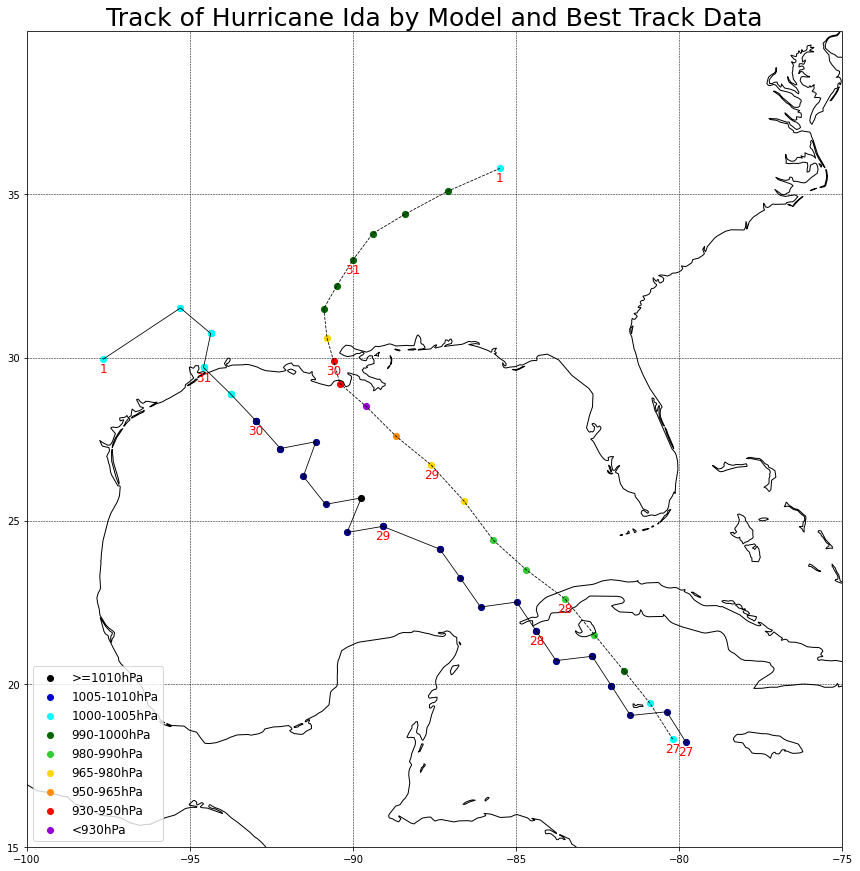

In [18]:
# Plot Ida Track
Fig = pyplot.figure(figsize=(15,15))
Axis = Fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())
Axis.coastlines()
#
# Plot Model SLP
pyplot.plot(Min_SLP_Lon_Lat[0], Min_SLP_Lon_Lat[1], c='black', linewidth=0.8, linestyle='-')
for i in range(len(Min_SLP)):
    pyplot.scatter(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i], c=Model_Colour_List[i], s=38)
# Label Points
    if i % 8 == 0 and i != 40:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]-0.3, str(int(i/8+27)), ha='center', va='center', \
        fontdict={'size':12}, color='red')
    if i == 40:
        Axis.text(Min_SLP_Lon_Lat[0][i], Min_SLP_Lon_Lat[1][i]-0.3, str(1), ha='center', va='center', \
        fontdict={'size':12}, color='red')
#
# Plot Ida Best Track SLP
pyplot.plot(BST_Lon, BST_Lat, c='black', linewidth=0.8, linestyle='--')
for i in range(len(BST_SLP)):
    pyplot.scatter(BST_Lon[i], BST_Lat[i], c=BST_Colour_List[i], s=38)
# Label Points
    if i % 4 == 0 and i != 20:
        Axis.text(BST_Lon[i], BST_Lat[i]-0.3, str(int(i/4+27)), ha='center', va='center', \
        fontdict={'size':12}, color='red')
    if i == 20:
        Axis.text(BST_Lon[i], BST_Lat[i]-0.3, str(1), ha='center', va='center', \
        fontdict={'size':12}, color='red')
#
# Add Gridlines
pyplot.xlim(-98,-75)
pyplot.ylim(15,40)
x_Axis = numpy.arange(-100,-70,5)
y_Axis = numpy.arange(15,40,5)
Axis.set_xticks(x_Axis)
Axis.set_yticks(y_Axis)
Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
Gridline.xlocator = mticker.FixedLocator(x_Axis)
Gridline.ylocator = mticker.FixedLocator(y_Axis)
pyplot.title('Track of Hurricane Ida by Model and Best Track Data', fontsize=25)
#
# Create Legend
for k in range(len(Colours)):
    pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
pyplot.legend(loc=3, fontsize=12)
Fig.savefig('Q1_Compare.png', bbox_inches='tight')

In [19]:
# Create DataFrame to Store Data
Q1_DF = pandas.DataFrame({"Time": Time_Step_List, "Pressure": Min_SLP, \
"Lon": Min_SLP_Lon_Lat[0], "Lat": Min_SLP_Lon_Lat[1]})
Q1_DF

,Time,Pressure,Lon,Lat
0,2021-08-27_00.00.00,1005.723594,-79.807373,18.224911
1,2021-08-27_03.00.00,1007.538828,-80.384949,19.139782
2,2021-08-27_06.00.00,1006.877813,-81.496277,19.026718
3,2021-08-27_09.00.00,1005.551953,-82.079865,19.934752
4,2021-08-27_12.00.00,1006.405234,-82.079865,19.934752
5,2021-08-27_15.00.00,1007.561328,-82.670135,20.841572
6,2021-08-27_18.00.00,1007.499844,-82.670135,20.841572
7,2021-08-27_21.00.00,1006.723281,-83.780151,20.708523
8,2021-08-28_00.00.00,1007.670625,-84.378357,21.607565
9,2021-08-28_03.00.00,1009.130547,-84.378357,21.607565


In [20]:
# Output Data File
Filename_Q1 = "Q1_Ida.csv"
Q1_DF.to_csv(Filename_Q1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


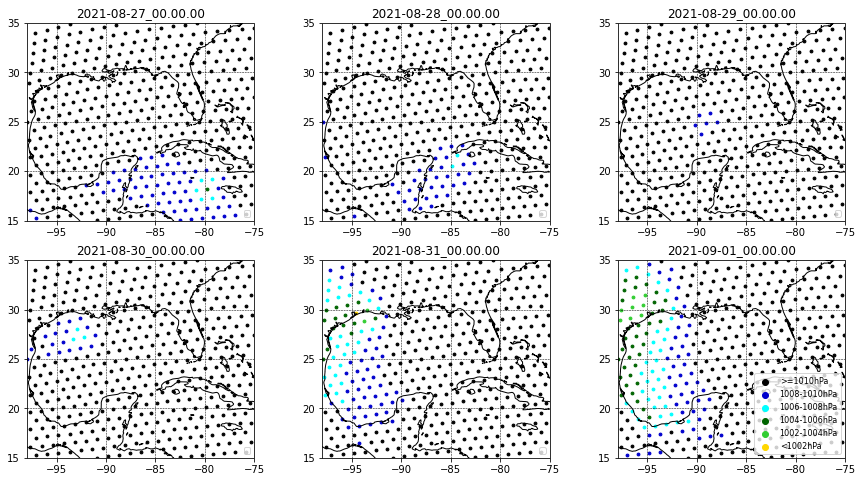

In [21]:
# Plot SLP Map on Each Day
Fig = pyplot.figure(figsize=(15,8))
Count = 0
for i in range(6):
    Count += 1
    Axis = Fig.add_subplot(2,3, Count, projection=ccrs.PlateCarree())
    Axis.coastlines()
#
# Open Longitude, Latitude, Surface Pressure and Altitude Files For Each Day
    File = xr.open_dataset(Diri + 'history.'+Time_Step_List[i*8] + '.nc')
    Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
    Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
    Sfc_Pressure_File = numpy.array(File.surface_pressure[0,:])
    Altitude_File = numpy.array(File.zgrid[:,0])
#
# Keep Data Within Target Area
    Longitude_List = []
    Latitude_List = []
    Sfc_Pressure_List = []
    Altitude_List = []
    for k in range(len(Latitude_File)):
        if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
            Longitude_List.append(Longitude_File[k])
            Latitude_List.append(Latitude_File[k])
            Sfc_Pressure_List.append(Sfc_Pressure_File[k])
            Altitude_List.append(Altitude_File[k])
    Longitude_NATL = numpy.array(Longitude_List)
    Latitude_NATL = numpy.array(Latitude_List)
    Sfc_Pressure_NATL = numpy.array(Sfc_Pressure_List)
    Altitude_NATL = numpy.array(Altitude_List)
#
# Estimate Sea Level Pressure Using Barometric Equation
    Scale_Height = 8500
    SLP_NATL = Sfc_Pressure_NATL / numpy.exp(-Altitude_NATL / Scale_Height) / 100.
#
# Create Colour List For Labelling Sea Level Pressure
    Colour_List = []
    Colours = ['black', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold']
    Colour_Labels = ['>=1010hPa', '1008-1010hPa', '1006-1008hPa', '1004-1006hPa', '1002-1004hPa', '<1002hPa']
    for j in range(len(SLP_NATL)):
        if SLP_NATL[j] >= 1010:
            Colour_List.append(Colours[0])
        elif SLP_NATL[j] >= 1008:
            Colour_List.append(Colours[1])
        elif SLP_NATL[j] >= 1006:
            Colour_List.append(Colours[2])
        elif SLP_NATL[j] >= 1004:
            Colour_List.append(Colours[3])
        elif SLP_NATL[j] >= 1002:
            Colour_List.append(Colours[4])
        else:
            Colour_List.append(Colours[5])
#
# Plot Sea Level Pressure Map
    for j in range(len(SLP_NATL)):
        pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=8)
#
# Add Gridlines
    pyplot.xlim(-98,-75)
    pyplot.ylim(15,35)
    x_Axis = numpy.arange(-95,-70,5)
    y_Axis = numpy.arange(15,40,5)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
    pyplot.title(Time_Step_List[i*8], fontsize=12)
#
# Create Legend For Colour Codes
    if Count == 6:
        for k in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
    pyplot.legend(loc=4, fontsize=8)
Fig.savefig('Q1_SLP_Map.png', bbox_inches='tight')

30.607296


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


30.180864


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


28.129156


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


30.58765


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


33.05042


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


20.854778


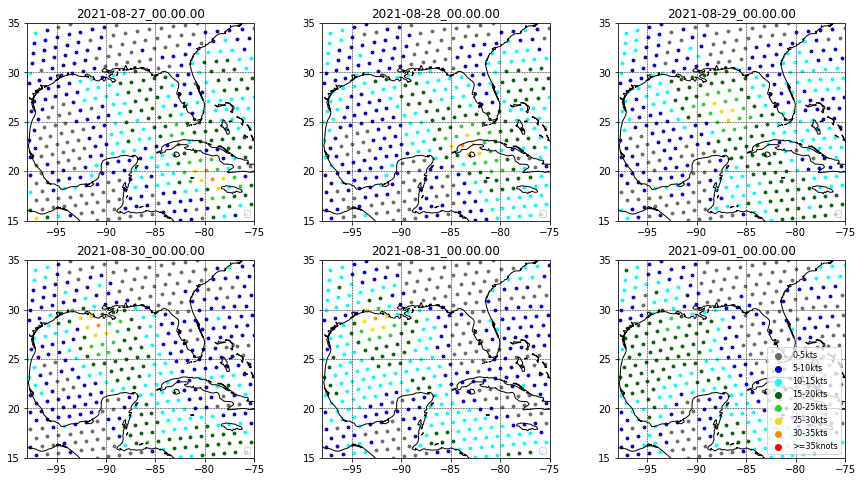

In [22]:
# Plot Windspeed Map on Each Day
Fig = pyplot.figure(figsize=(15,8))
Count = 0
for i in range(6):
    Count += 1
    Axis = Fig.add_subplot(2,3, Count, projection=ccrs.PlateCarree())
    Axis.coastlines()
#
# Open Longitude, Latitude, Surface Pressure and Altitude Files For Each Day
    File = xr.open_dataset(Diri + 'history.'+Time_Step_List[i*8] + '.nc')
    Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
    Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
    U10_File = numpy.array(File.u10[0]) * 3.6 / 1.852
    V10_File = numpy.array(File.v10[0]) * 3.6 / 1.852
#
# Keep Data Within Target Area
    Longitude_List = []
    Latitude_List = []
    U10_List = []
    V10_List = []
    for k in range(len(Latitude_File)):
        if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
            Longitude_List.append(Longitude_File[k])
            Latitude_List.append(Latitude_File[k])
            U10_List.append(U10_File[k])
            V10_List.append(V10_File[k])
    Longitude_NATL = numpy.array(Longitude_List)
    Latitude_NATL = numpy.array(Latitude_List)
    Windspeed_NATL = numpy.sqrt(numpy.array(U10_List) **2 + numpy.array(V10_List) **2)
    print (numpy.max(Windspeed_NATL))
#
# Create Colour List For Labelling Windspeed
    Colour_List = []
    Colours = ['dimgrey', 'mediumblue', 'cyan', 'darkgreen', 'limegreen', 'gold', 'darkorange', 'red']
    Colour_Labels = ['0-5kts', '5-10kts', '10-15kts', '15-20kts', '20-25kts', '25-30kts', '30-35kts', '>=35knots']
    for j in range(len(Windspeed_NATL)):
        if Windspeed_NATL[j] < 5:
            Colour_List.append(Colours[0])
        elif Windspeed_NATL[j] < 10:
            Colour_List.append(Colours[1])
        elif Windspeed_NATL[j] < 15:
            Colour_List.append(Colours[2])
        elif Windspeed_NATL[j] < 20:
            Colour_List.append(Colours[3])
        elif Windspeed_NATL[j] < 25:
            Colour_List.append(Colours[4])
        elif Windspeed_NATL[j] < 30:
            Colour_List.append(Colours[5])
        elif Windspeed_NATL[j] < 35:
            Colour_List.append(Colours[6])
        else:
            Colour_List.append(Colours[7])
#
# Plot Windspeed Map
    for j in range(len(Windspeed_NATL)):
        pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=8)
#
#
# Add Gridlines
    pyplot.xlim(-98,-75)
    pyplot.ylim(15,35)
    x_Axis = numpy.arange(-95,-70,5)
    y_Axis = numpy.arange(15,40,5)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
    pyplot.title(Time_Step_List[i*8], fontsize=12)
#
# Create Legend For Colour Codes
    if Count == 6:
        for k in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
    pyplot.legend(loc=4, fontsize=8)
Fig.savefig('Q1_Windspeed_Map.png', bbox_inches='tight')

0.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8.009261


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


3.2955248


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


5.278788


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


8.208448


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


5.8715024


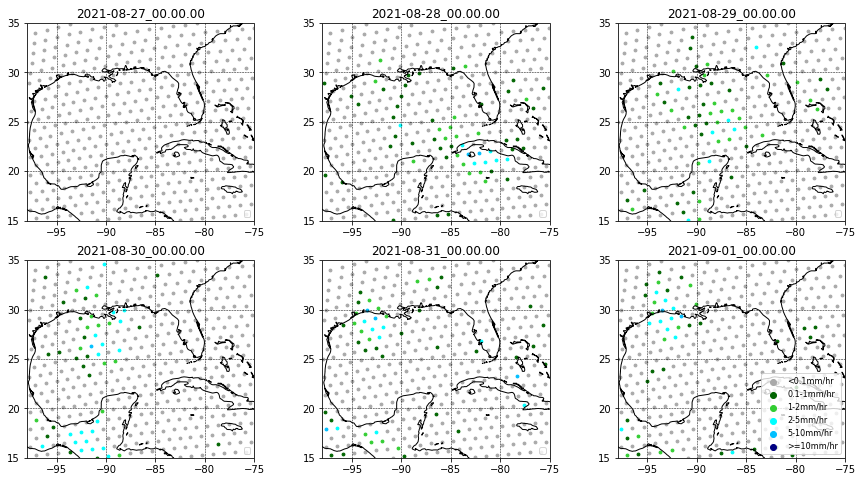

In [26]:
# Plot Precip Map on Each Day
Fig = pyplot.figure(figsize=(15,8))
Count = 0
for i in range(6):
    Count += 1
    Axis = Fig.add_subplot(2,3, Count, projection=ccrs.PlateCarree())
    Axis.coastlines()
#
# Open Longitude, Latitude, Surface Pressure and Altitude Files For Each Day
    File = xr.open_dataset(Diri + 'history.'+Time_Step_List[i*8] + '.nc')
    Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
    Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
    Rain_File = numpy.array(File.cuprec[0]) * 3600
#
# Keep Data Within Target Area
    Longitude_List = []
    Latitude_List = []
    Rain_List = []
    for k in range(len(Latitude_File)):
        if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >=360-98 and Longitude_File[k] < 360-75:
            Longitude_List.append(Longitude_File[k])
            Latitude_List.append(Latitude_File[k])
            Rain_List.append(Rain_File[k])
    Longitude_NATL = numpy.array(Longitude_List)
    Latitude_NATL = numpy.array(Latitude_List)
    Rain_NATL = numpy.array(Rain_List)
    print (numpy.max(Rain_NATL))
#
# Create Colour List For Labelling Precip
    Colour_List = []
    Colours = ['darkgrey', 'darkgreen', 'limegreen', 'cyan', 'deepskyblue', 'navy']
    Colour_Labels = ['<0.1mm/hr', '0.1-1mm/hr', '1-2mm/hr', '2-5mm/hr', '5-10mm/hr', '>=10mm/hr']
    for j in range(len(Rain_NATL)):
        if Rain_NATL[j] < 0.1:
            Colour_List.append(Colours[0])
        elif Rain_NATL[j] < 1:
            Colour_List.append(Colours[1])
        elif Rain_NATL[j] < 2:
            Colour_List.append(Colours[2])
        elif Rain_NATL[j] < 5:
            Colour_List.append(Colours[3])
        elif Rain_NATL[j] < 10:
            Colour_List.append(Colours[4])
        else:
            Colour_List.append(Colours[5])
#
# Plot Precip Map
    for j in range(len(Rain_NATL)):
        pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=8)
#
# Add Gridlines
    pyplot.xlim(-98,-75)
    pyplot.ylim(15,35)
    x_Axis = numpy.arange(-95,-70,5)
    y_Axis = numpy.arange(15,40,5)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
    pyplot.title(Time_Step_List[i*8], fontsize=12)
#
# Create Legend For Colour Codes
    if Count == 6:
        for k in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
    pyplot.legend(loc=4, fontsize=8)
Fig.savefig('Q1_Precip_Map.png', bbox_inches='tight')

In [24]:
File = xr.open_dataset(Diri + 'history.'+Time_Step_List[25] + '.nc')
Longitude_File = numpy.array(File.lonCell * 360 / (2*numpy.pi))
Latitude_File = numpy.array(File.latCell * 360 / (2*numpy.pi))
Pressure_File = numpy.array(File.pressure[0,:,7] / 100.)
numpy.mean(Pressure_File)

841.79144

0.0007217821
-0.00024580763


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00024636622
-9.018908e-05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00018128146
-0.0001062421


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0002083262
-7.9397316e-05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.00037218304
-9.126596e-05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0002621405
-0.0001063837


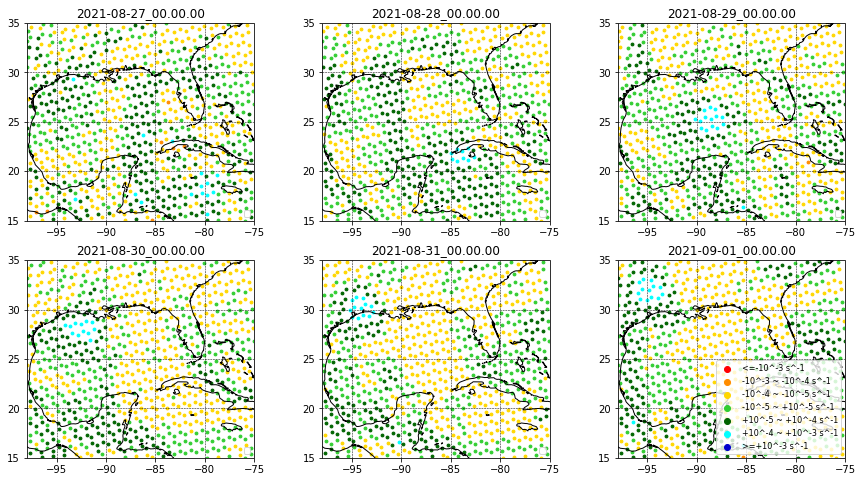

In [27]:
# Plot 850hPa Vorticity Map on Each Day
Fig = pyplot.figure(figsize=(15,8))
Count = 0
for i in range(6):
    Count += 1
    Axis = Fig.add_subplot(2,3, Count, projection=ccrs.PlateCarree())
    Axis.coastlines()
#
# Open Longitude, Latitude, Surface Pressure and Altitude Files For Each Day
    File = xr.open_dataset(Diri + 'history.'+Time_Step_List[i*8] + '.nc')
    Longitude_File = numpy.array(File.lonVertex * 360 / (2*numpy.pi))
    Latitude_File = numpy.array(File.latVertex * 360 / (2*numpy.pi))
    Vorticity_File = numpy.array(File.vorticity[0,:,7])
#
# Keep Data Within Target Area
    Longitude_List = []
    Latitude_List = []
    Vorticity_List = []
    for k in range(len(Latitude_File)):
        if Latitude_File[k] >= 15 and Latitude_File[k] <= 35 and Longitude_File[k] >= -98 and Longitude_File[k] < -75:
            Longitude_List.append(Longitude_File[k])
            Latitude_List.append(Latitude_File[k])
            Vorticity_List.append(Vorticity_File[k])
    Longitude_NATL = numpy.array(Longitude_List)
    Latitude_NATL = numpy.array(Latitude_List)
    Vorticity_NATL = numpy.array(Vorticity_List)
    print (numpy.max(Vorticity_NATL))
    print (numpy.min(Vorticity_NATL))
#
# Create Colour List For Labelling Vorticity
    Colour_List = []
    Colours = ['red', 'darkorange', 'gold', 'limegreen', 'darkgreen', 'cyan', 'mediumblue']
    Colour_Labels = ['<=-10^-3 s^-1', '-10^-3 ~ -10^-4 s^-1', '-10^-4 ~ -10^-5 s^-1', \
    '-10^-5 ~ +10^-5 s^-1', '+10^-5 ~ +10^-4 s^-1', '+10^-4 ~ +10^-3 s^-1', '>=+10^-3 s^-1']
    for j in range(len(Vorticity_NATL)):
        if Vorticity_NATL[j] <= -10**-3:
            Colour_List.append(Colours[0])
        elif Vorticity_NATL[j] <= -10**-4:
            Colour_List.append(Colours[1])
        elif Vorticity_NATL[j] <= -10**-5:
            Colour_List.append(Colours[2])
        elif Vorticity_NATL[j] < 10**-5:
            Colour_List.append(Colours[3])
        elif Vorticity_NATL[j] < 10**-4:
            Colour_List.append(Colours[4])
        elif Vorticity_NATL[j] < 10**-3:
            Colour_List.append(Colours[5])
        else:
            Colour_List.append(Colours[6])
#
# Plot Vorticity Map
    for j in range(len(Vorticity_NATL)):
        pyplot.scatter(Longitude_NATL[j], Latitude_NATL[j], c=Colour_List[j], s=8)
#
# Add Gridlines
    pyplot.xlim(-98,-75)
    pyplot.ylim(15,35)
    x_Axis = numpy.arange(-95,-70,5)
    y_Axis = numpy.arange(15,40,5)
    Axis.set_xticks(x_Axis)
    Axis.set_yticks(y_Axis)
    Gridline = Axis.gridlines(crs=ccrs.PlateCarree(), linewidth=0.5, color='black', linestyle='--')
    Gridline.xlocator = mticker.FixedLocator(x_Axis)
    Gridline.ylocator = mticker.FixedLocator(y_Axis)
    pyplot.title(Time_Step_List[i*8], fontsize=12)
#
# Create Legend For Colour Codes
    if Count == 6:
        for k in range(len(Colours)):
            pyplot.scatter([0,0], [0,0], c=Colours[k], label=Colour_Labels[k])
    pyplot.legend(loc=4, fontsize=8)
Fig.savefig('Q1_Vorticity_Map.png', bbox_inches='tight')